In [1]:
import os
import pickle
import pandas as pd
import json
import sys
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Switch to parent path to import local module
parent_path = str(os.getcwd()).split('notebooks')[0] # zeosyn_gen
os.chdir(parent_path)
print('Switched directory to:', os.getcwd())

from eval_cvae import get_metric_dataframes, get_prediction_and_ground_truths, eval_single_system
import data.utils as utils
sys.modules['utils'] = utils # Way to get around relative imports in utils for ZeoSynGen_dataset # https://stackoverflow.com/questions/2121874/python-pickling-after-changing-a-modules-directory

/home/synthesisproject/anaconda3/envs/zeo_diffusion_metrics/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/synthesisproject/anaconda3/envs/zeo_diffusion_metrics/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Switched directory to: /home/jupyter/Elton/Zeolites/zeosyn_gen


In [2]:
model_type = 'cvae'
split = 'system'

fname = 'v9'
with open(f'runs/{model_type}/{split}/{fname}/configs.json') as f:
    configs_v9 = json.load(f)

fname = 'v10'
with open(f'runs/{model_type}/{split}/{fname}/configs.json') as f:
    configs_v10 = json.load(f)

syn_pred_v9, syn_pred_scaled_v9, syn_true_v9, syn_true_scaled_v9, dataset = get_prediction_and_ground_truths(_, configs_v9)
syn_pred_v10, syn_pred_scaled_v10, syn_true_v10, syn_true_scaled_v10, _ = get_prediction_and_ground_truths(_, configs_v10)

mmd_zeo_agg_df_v9, wsd_zeo_agg_df_v9, mmd_zeo_osda_df_v9, wsd_zeo_osda_df_v9 = get_metric_dataframes(configs_v9)
mmd_zeo_agg_df_v10, wsd_zeo_agg_df_v10, mmd_zeo_osda_df_v10, wsd_zeo_osda_df_v10 = get_metric_dataframes(configs_v10)

Getting model predictions and grouth truths...
SYSTEMS:
train+val: 1856 test: 464

n_datapoints:
train: 14749 val: 2107 test: 5168
Loading synthetic predictions from saved predictions...
Getting model predictions and grouth truths...
SYSTEMS:
train+val: 1856 test: 464

n_datapoints:
train: 14749 val: 2107 test: 5168
Loading synthetic predictions from saved predictions...


# Metrics in decreasing frequency in test set

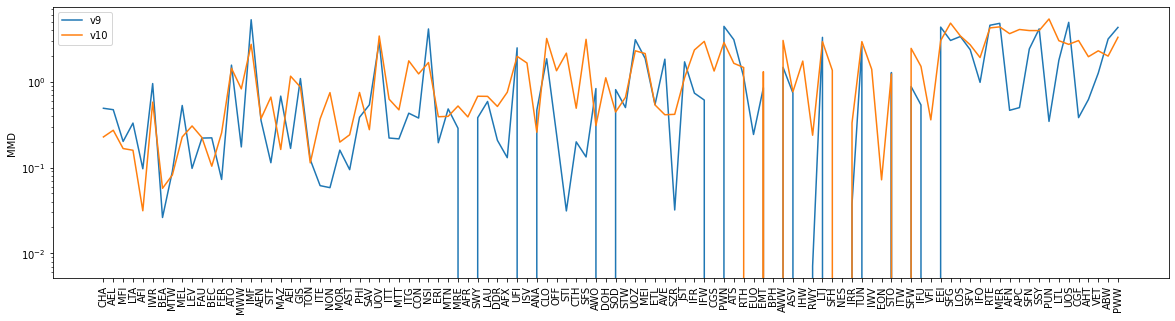

In [3]:
plt.figure(figsize=(20, 5))
plt.plot(mmd_zeo_agg_df_v9['zeo'], mmd_zeo_agg_df_v9['MMD'], label='v9')
plt.plot(mmd_zeo_agg_df_v10['zeo'], mmd_zeo_agg_df_v10['MMD'], label='v10')
plt.ylabel('MMD')
plt.xticks(rotation=90)
plt.yscale('log')
plt.legend()
plt.show()

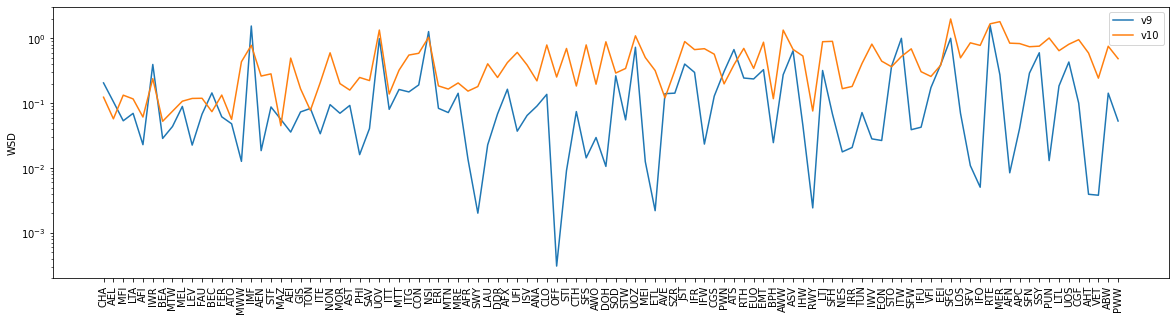

In [4]:
plt.figure(figsize=(20, 5))
plt.plot(wsd_zeo_agg_df_v9['zeo'], wsd_zeo_agg_df_v9['WSD'], label='v9')
plt.plot(wsd_zeo_agg_df_v10['zeo'], wsd_zeo_agg_df_v10['WSD'], label='v10')
plt.ylabel('WSD')
plt.xticks(rotation=90)
plt.yscale('log')
plt.legend()
plt.show()

MMD v9: 0.2216138839721679
WSD v9: 0.1437506065964757

MMD v10: 0.1035661697387695
WSD v10: 0.0739224324042668


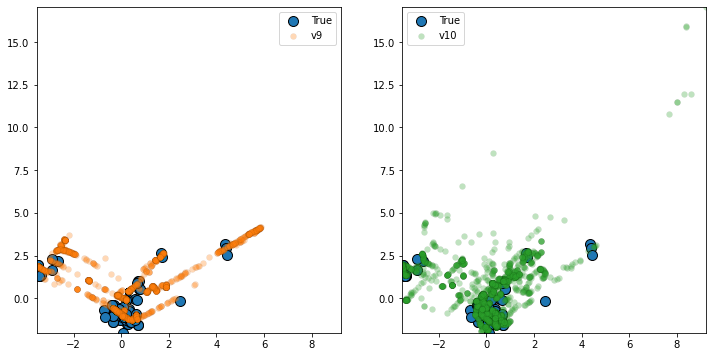

In [5]:
def compare_side_by_side(syn_pred1, syn_pred_scaled1, syn_pred2, syn_pred_scaled2, syn_true, syn_true_scaled, dataset, mmd_zeo_agg_df1, wsd_zeo_agg_df1, mmd_zeo_osda_df1, wsd_zeo_osda_df1, mmd_zeo_agg_df2, wsd_zeo_agg_df2, mmd_zeo_osda_df2, wsd_zeo_osda_df2, zeo, osda=None, plot=True, print_metrics=True, pca=False):
    
    if osda == None: # Zeolite-aggregated
        if plot:
            print(f'====== ZEO: {zeo} ======')

        sys_syn_true = syn_true[syn_true['zeo'] == zeo]
        sys_syn_true_scaled = syn_true_scaled[syn_true_scaled['zeo'] == zeo]

        sys_syn_pred1 = syn_pred1[syn_pred1['zeo'] == zeo]
        sys_syn_pred2 = syn_pred2[syn_pred2['zeo'] == zeo]

        sys_syn_pred_scaled1 = syn_pred_scaled1[syn_pred_scaled1['zeo'] == zeo]
        sys_syn_pred_scaled2 = syn_pred_scaled2[syn_pred_scaled2['zeo'] == zeo]

        if print_metrics:
            mmd1 = mmd_zeo_agg_df1[mmd_zeo_agg_df1['zeo']==zeo]['MMD'].item()
            mmd2 = mmd_zeo_agg_df2[mmd_zeo_agg_df2['zeo']==zeo]['MMD'].item()
            wsd1 = wsd_zeo_agg_df1[wsd_zeo_agg_df1['zeo']==zeo]['WSD'].item()
            wsd2 = wsd_zeo_agg_df2[wsd_zeo_agg_df2['zeo']==zeo]['WSD'].item()

            print('MMD v9:', mmd1)
            print('WSD v9:', wsd1)
            print()
            print('MMD v10:', mmd2)
            print('WSD v10:', wsd2)

    else: # Zeolite-OSDA
        if plot:
            print(f'====== ZEO: {zeo} OSDA: {osda} ======')

        sys_syn_true = syn_true[(syn_true['zeo'] == zeo) & (syn_true['osda'] == osda)]
        sys_syn_true_scaled = syn_true_scaled[(syn_true_scaled['zeo'] == zeo) & (syn_true_scaled['osda'] == osda)]

        sys_syn_pred1 = syn_pred1[(syn_pred1['zeo'] == zeo) & (syn_pred1['osda'] == osda)]
        sys_syn_pred2 = syn_pred2[(syn_pred2['zeo'] == zeo) & (syn_pred2['osda'] == osda)]

        sys_syn_pred_scaled1 = syn_pred_scaled1[(syn_pred_scaled1['zeo'] == zeo) & (syn_pred_scaled1['osda'] == osda)]
        sys_syn_pred_scaled2 = syn_pred_scaled2[(syn_pred_scaled2['zeo'] == zeo) & (syn_pred_scaled2['osda'] == osda)]

        if print_metrics:
            mmd1 = mmd_zeo_osda_df1[(mmd_zeo_osda_df1['zeo']==zeo) & (mmd_zeo_osda_df1['osda']==osda)]['MMD'].item()
            mmd2 = mmd_zeo_osda_df2[(mmd_zeo_osda_df2['zeo']==zeo) & (mmd_zeo_osda_df2['osda']==osda)]['MMD'].item()
            wsd1 = wsd_zeo_osda_df1[(wsd_zeo_osda_df1['zeo']==zeo) & (wsd_zeo_osda_df1['osda']==osda)]['WSD'].item()
            wsd2 = wsd_zeo_osda_df2[(wsd_zeo_osda_df2['zeo']==zeo) & (wsd_zeo_osda_df2['osda']==osda)]['WSD'].item()

            print('MMD v9:', mmd1)
            print('WSD v9:', wsd1)
            print()
            print('MMD v10:', mmd2)
            print('WSD v10:', wsd2)

    if plot:
        utils.compare_gel_conds([sys_syn_pred1, sys_syn_pred2, sys_syn_true], ['v9', 'v10', 'True'], [True, True, False], [False, False, True], ['tab:orange', 'tab:green', 'tab:blue'], common_norm=True, alpha=0.35)
    
    if pca:
        combined_df = pd.concat([sys_syn_pred1, sys_syn_pred2, sys_syn_true])
        combined_df['origin'] = ['v9']*len(sys_syn_pred1) + ['v10']*len(sys_syn_pred2) + ['True']*len(sys_syn_true)
        X = combined_df[dataset.ratio_names+dataset.cond_names].values
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)
        X_pca = pd.DataFrame({'PC1': X_pca[:, 0], 'PC2': X_pca[:, 1], 'origin': combined_df['origin']})
        
        sys_syn_pred_pca1 = X_pca[X_pca['origin'] == 'v9']
        sys_syn_pred_pca2 = X_pca[X_pca['origin'] == 'v10']
        sys_syn_true_pca = X_pca[X_pca['origin'] == 'True']

        fig = plt.figure(figsize=(12, 6))

        ax1 = fig.add_subplot(1, 2, 1)
        ax1.scatter(sys_syn_true_pca['PC1'], sys_syn_true_pca['PC2'], label='True', color='tab:blue', alpha=1, s=100, linewidth=1, edgecolor='black')
        ax1.scatter(sys_syn_pred_pca1['PC1'], sys_syn_pred_pca1['PC2'], label='v9', color='tab:orange', alpha=0.3, linewidth=0.1, edgecolor='black')
        ax1.legend()
        ax1.set_xlim(X_pca['PC1'].min(), X_pca['PC1'].max())
        ax1.set_ylim(X_pca['PC2'].min(), X_pca['PC2'].max())
    
        ax2 = fig.add_subplot(1, 2, 2)
        ax2.scatter(sys_syn_true_pca['PC1'], sys_syn_true_pca['PC2'], label='True', color='tab:blue', alpha=1, s=100, linewidth=1, edgecolor='black')
        ax2.scatter(sys_syn_pred_pca2['PC1'], sys_syn_pred_pca2['PC2'], label='v10', color='tab:green', alpha=0.3, linewidth=0.1, edgecolor='black')
        ax2.legend()
        ax2.set_xlim(X_pca['PC1'].min(), X_pca['PC1'].max())
        ax2.set_ylim(X_pca['PC2'].min(), X_pca['PC2'].max())
        
        plt.show()

    print()
    
compare_side_by_side(syn_pred_v9, syn_pred_scaled_v9, syn_pred_v10, syn_pred_scaled_v10, syn_true_v9, syn_true_scaled_v9, dataset, mmd_zeo_agg_df_v9, wsd_zeo_agg_df_v9, mmd_zeo_osda_df_v9, wsd_zeo_osda_df_v9, mmd_zeo_agg_df_v10, wsd_zeo_agg_df_v10, mmd_zeo_osda_df_v10, wsd_zeo_osda_df_v10, zeo='BEC', plot=False, pca=True)

# Zeolite-aggregated

MMD v9: 0.4902276992797851
WSD v9: 0.2049860147530744

MMD v10: 0.2270488739013672
WSD v10: 0.1234055284623895


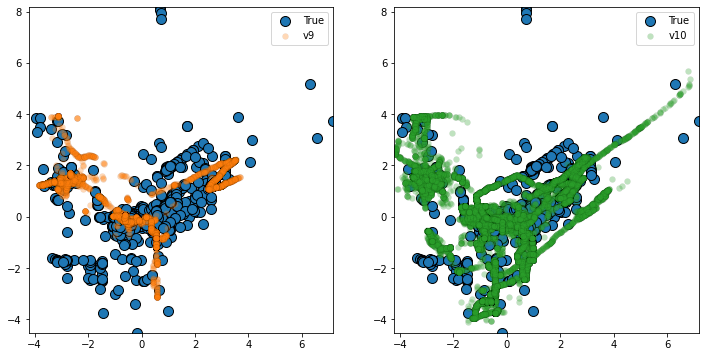


MMD v9: 0.4718341827392578
WSD v9: 0.1051624182522638

MMD v10: 0.2717819213867187
WSD v10: 0.0573670332500681


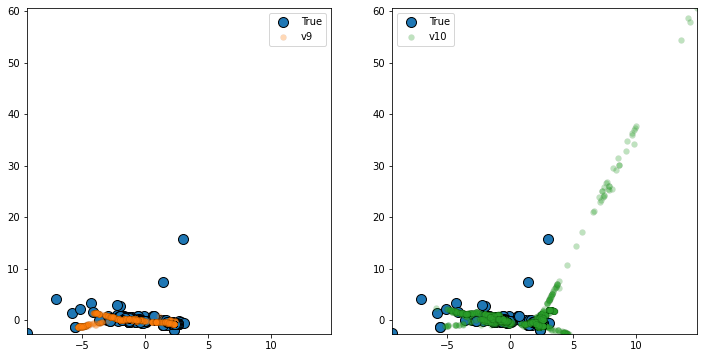


MMD v9: 0.2011032104492187
WSD v9: 0.0534990278483909

MMD v10: 0.1663188934326172
WSD v10: 0.1327364396861895


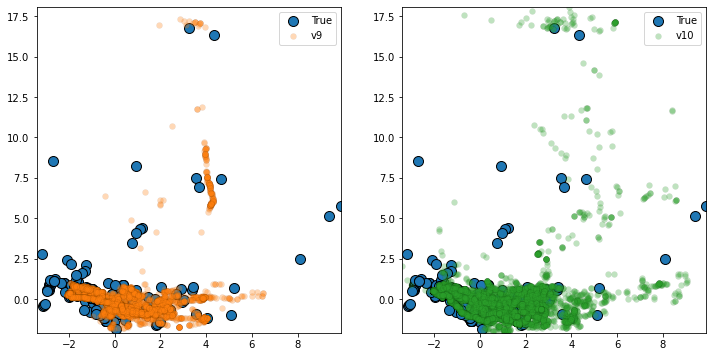


MMD v9: 0.3295369148254394
WSD v9: 0.0695925032499771

MMD v10: 0.158881664276123
WSD v10: 0.1161977561179953


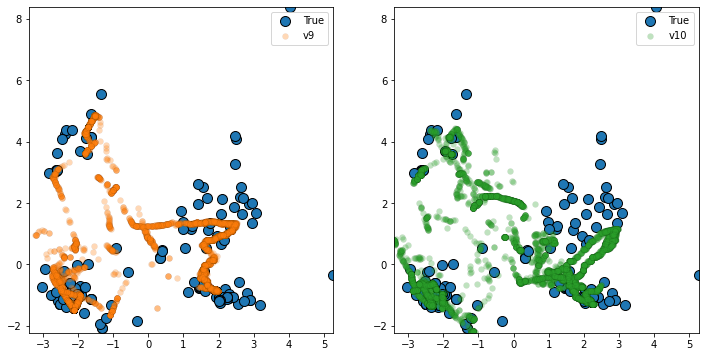


MMD v9: 0.0966787338256836
WSD v9: 0.0229179035772445

MMD v10: 0.0313119888305664
WSD v10: 0.0611221704642627


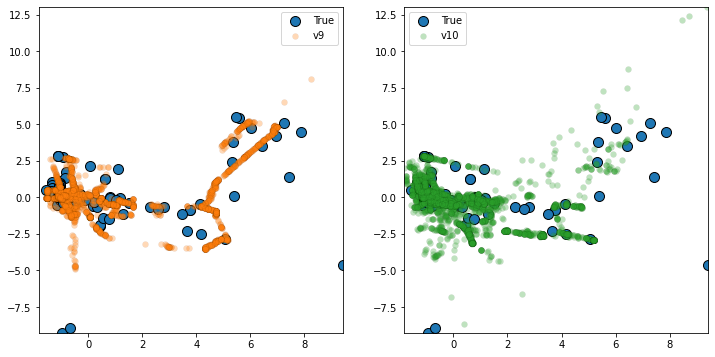


MMD v9: 0.95143461227417
WSD v9: 0.394469225964524

MMD v10: 0.5780611038208008
WSD v10: 0.2383899767663029


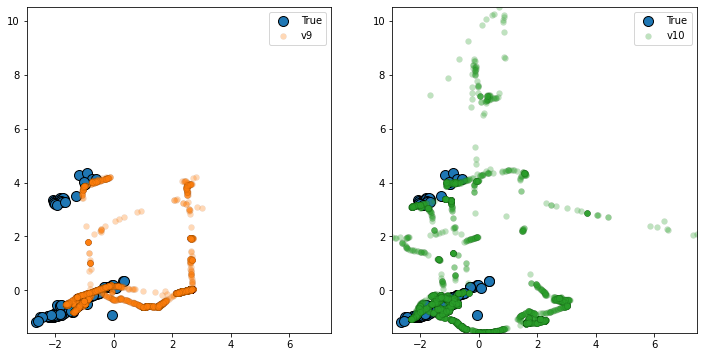


MMD v9: 0.0261478424072265
WSD v9: 0.0286029394857993

MMD v10: 0.0572099685668945
WSD v10: 0.052514567327067


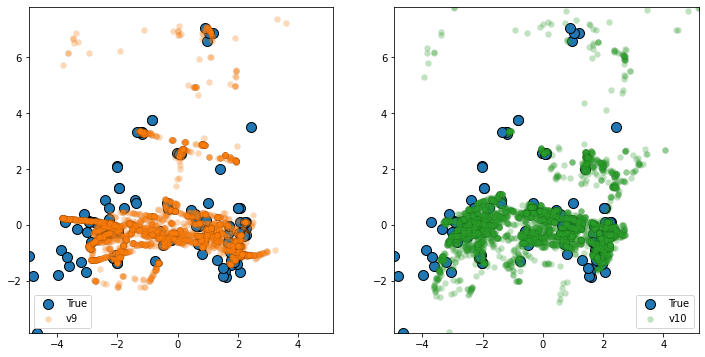


MMD v9: 0.0903272628784179
WSD v9: 0.043661300323506

MMD v10: 0.0818071365356445
WSD v10: 0.0750745985987606


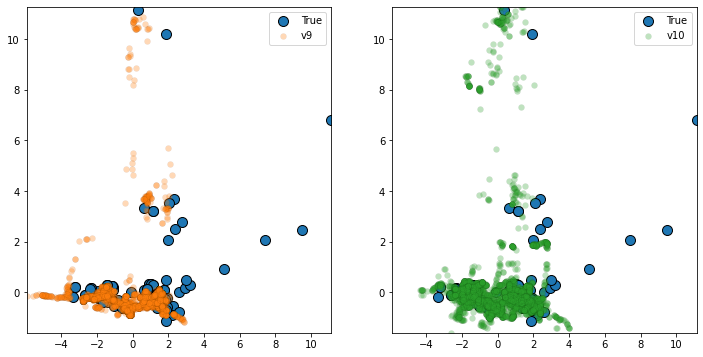


MMD v9: 0.5282268524169922
WSD v9: 0.0890261904789735

MMD v10: 0.2271022796630859
WSD v10: 0.1071135070658056


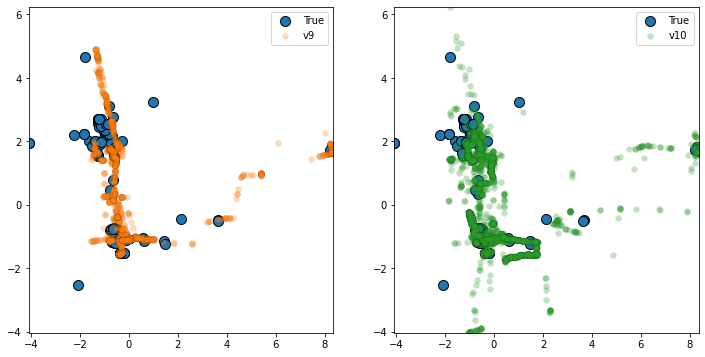


MMD v9: 0.0976495742797851
WSD v9: 0.0225714643870337

MMD v10: 0.3050107955932617
WSD v10: 0.1181884659228243


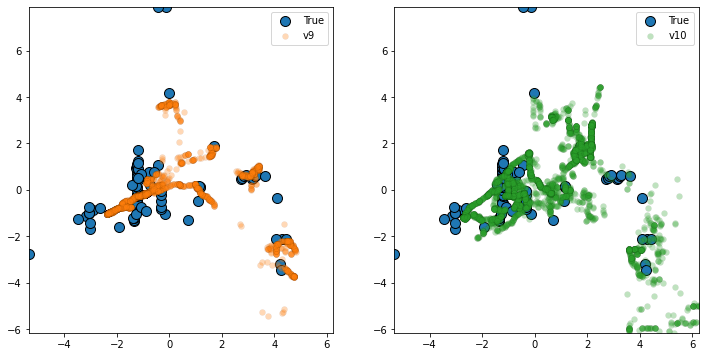


MMD v9: 0.2202520370483398
WSD v9: 0.0676640282236158

MMD v10: 0.2238664627075195
WSD v10: 0.118881455007565


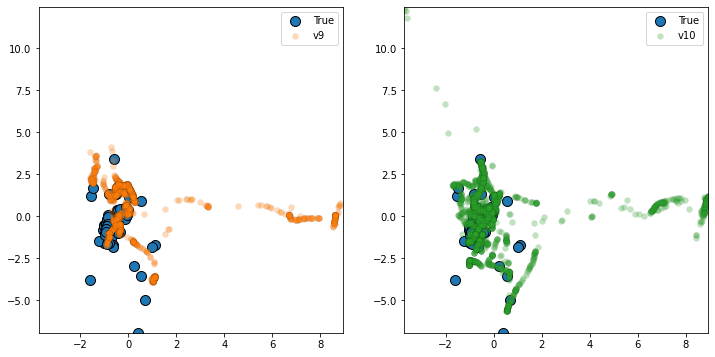


MMD v9: 0.2216138839721679
WSD v9: 0.1437506065964757

MMD v10: 0.1035661697387695
WSD v10: 0.0739224324042668


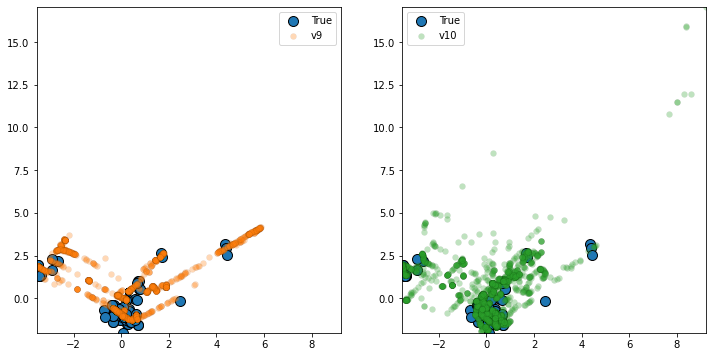


MMD v9: 0.0725412368774414
WSD v9: 0.0615496281583757

MMD v10: 0.2538967132568359
WSD v10: 0.1331114839215356


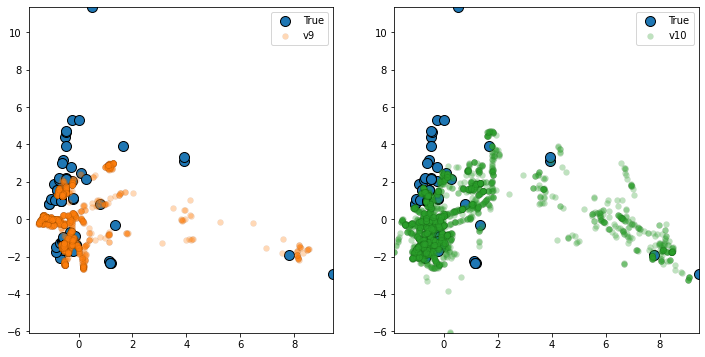


MMD v9: 1.560288429260254
WSD v9: 0.0481283307112068

MMD v10: 1.435647964477539
WSD v10: 0.0562197658515655


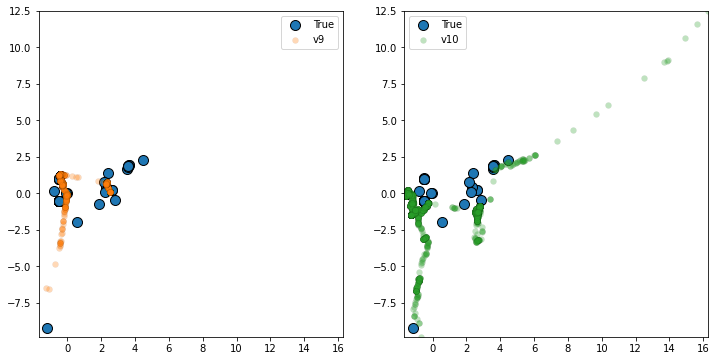


MMD v9: 0.1737470626831054
WSD v9: 0.0126796389329543

MMD v10: 0.8251819610595703
WSD v10: 0.4343392346340534


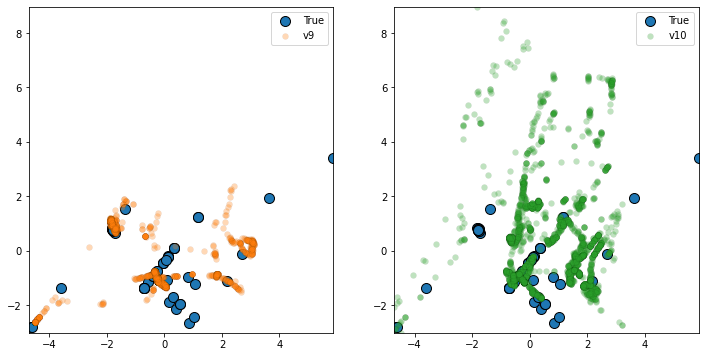


MMD v9: 5.277106285095215
WSD v9: 1.5429847711671938

MMD v10: 2.727296829223633
WSD v10: 0.777560353380454


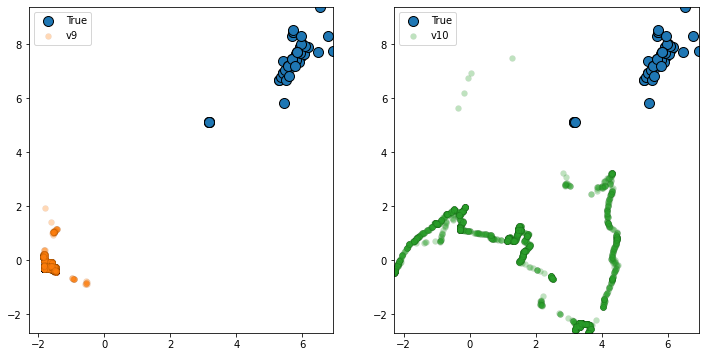


MMD v9: 0.3535900115966797
WSD v9: 0.0185492837825918

MMD v10: 0.3715429306030273
WSD v10: 0.2613671792041163


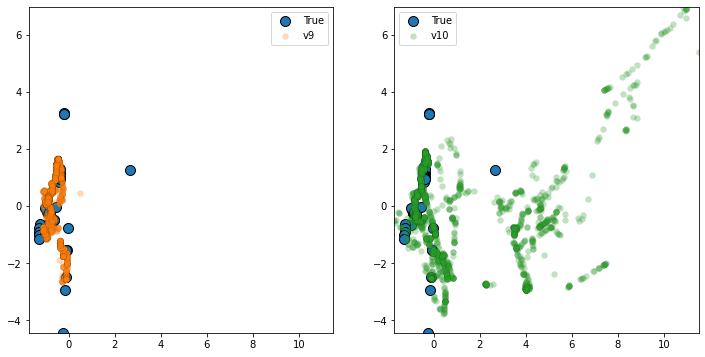


MMD v9: 0.1137104034423828
WSD v9: 0.0873348709970073

MMD v10: 0.6619930267333984
WSD v10: 0.282571910931769


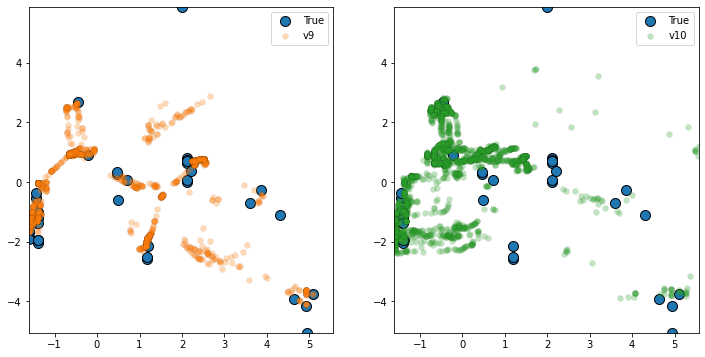


MMD v9: 0.6793203353881836
WSD v9: 0.0561751580525872

MMD v10: 0.1622152328491211
WSD v10: 0.0449400556666653


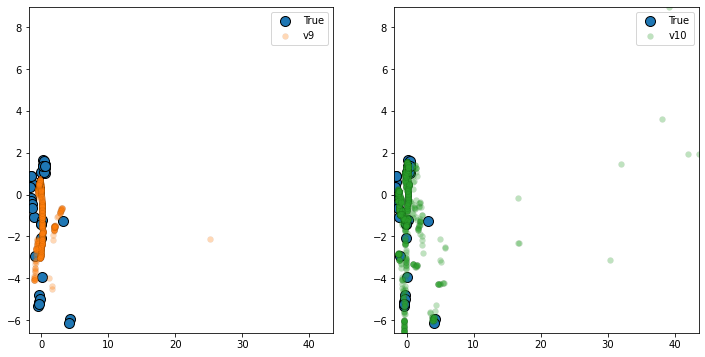


MMD v9: 0.1669569015502929
WSD v9: 0.0358328828256673

MMD v10: 1.159407615661621
WSD v10: 0.4945250925331349


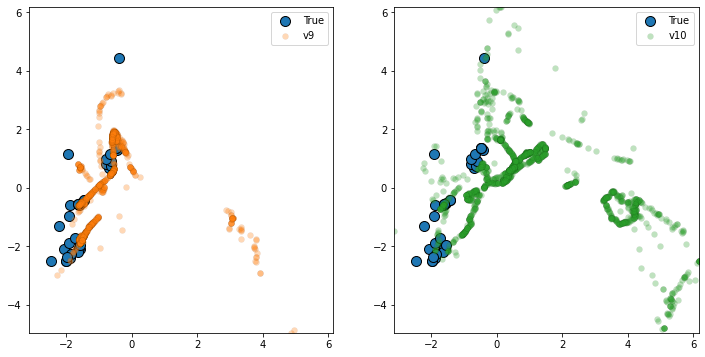


MMD v9: 1.0880584716796875
WSD v9: 0.0731858463150887

MMD v10: 0.865565299987793
WSD v10: 0.1664825181350349


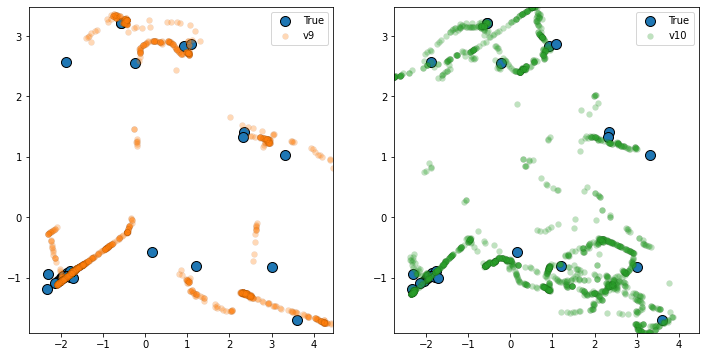


MMD v9: 0.1234779357910156
WSD v9: 0.0828242548206612

MMD v10: 0.1132488250732421
WSD v10: 0.0774120842886719


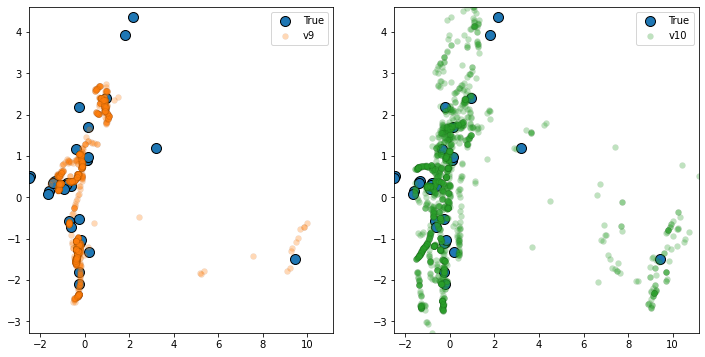


MMD v9: 0.0614633560180664
WSD v9: 0.0337636808110509

MMD v10: 0.3687620162963867
WSD v10: 0.2074721063537419


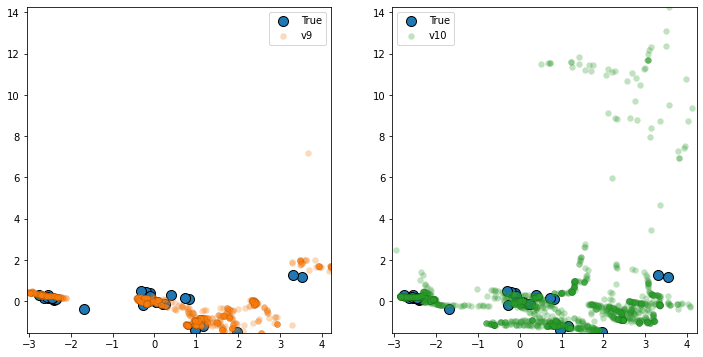


MMD v9: 0.0582227706909179
WSD v9: 0.0948039021746401

MMD v10: 0.7463102340698242
WSD v10: 0.5963358793600724


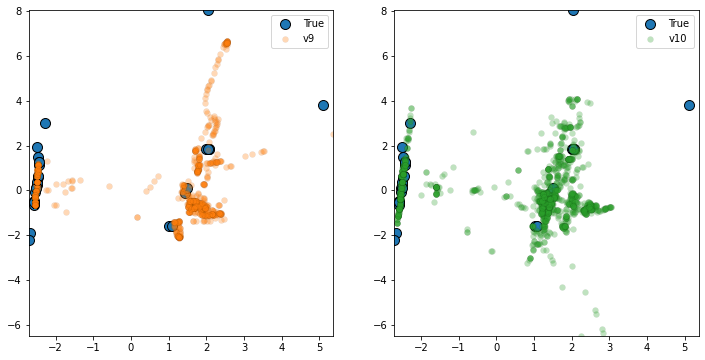


MMD v9: 0.1594648361206054
WSD v9: 0.0698496017044075

MMD v10: 0.1976346969604492
WSD v10: 0.1999740248545163


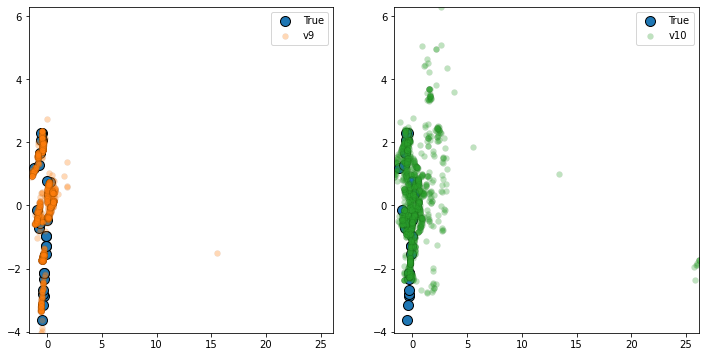


MMD v9: 0.0943641662597656
WSD v9: 0.092231143918779

MMD v10: 0.2407960891723632
WSD v10: 0.1588826521415122


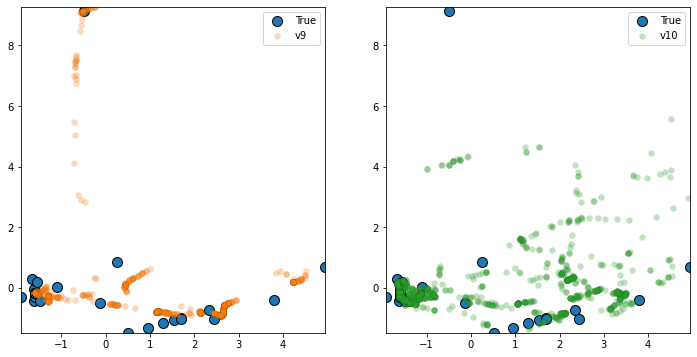


MMD v9: 0.3846969604492187
WSD v9: 0.0160910106576439

MMD v10: 0.7490997314453125
WSD v10: 0.2486922283073456


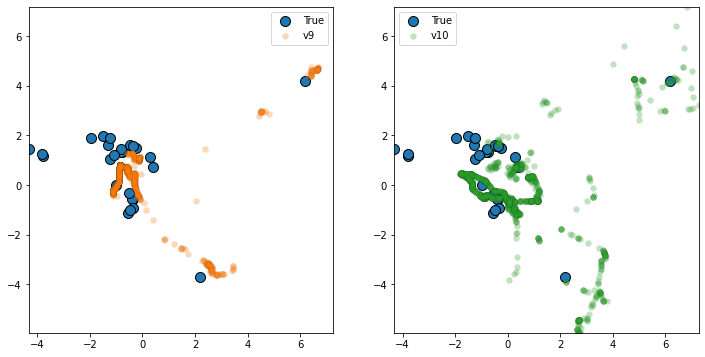


MMD v9: 0.5379724502563477
WSD v9: 0.0406647382979758

MMD v10: 0.2758541107177734
WSD v10: 0.222753539651447


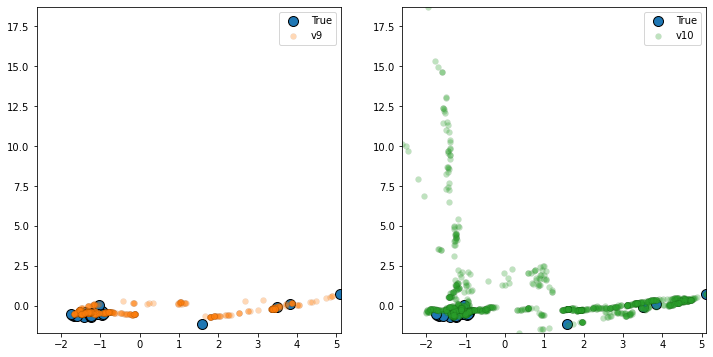


MMD v9: 2.9304637908935547
WSD v9: 0.986976931562558

MMD v10: 3.4091925621032715
WSD v10: 1.336136504792104


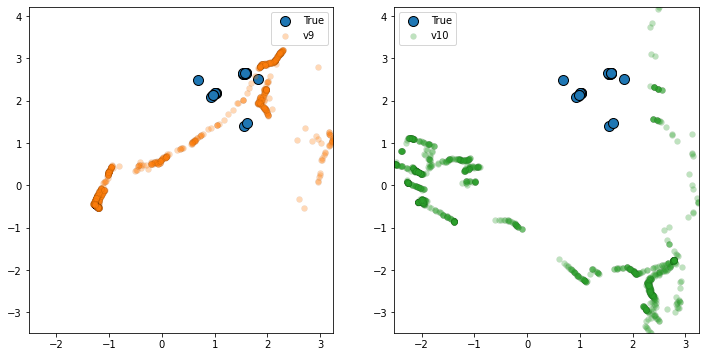


MMD v9: 0.2206287384033203
WSD v9: 0.0803555909477306

MMD v10: 0.6265220642089844
WSD v10: 0.1382425545418362


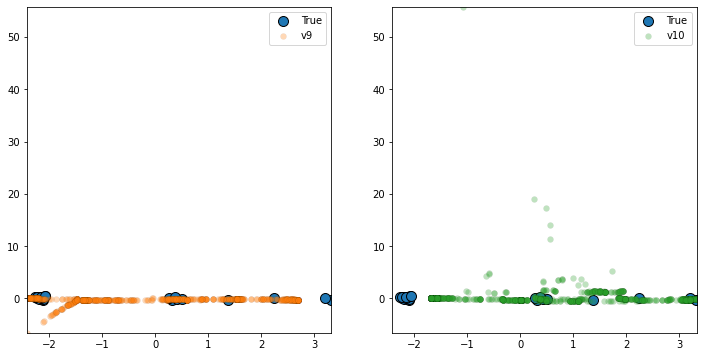

In [6]:
count = 0
for zeo in mmd_zeo_agg_df_v9['zeo']:
    try:
        compare_side_by_side(syn_pred_v9, syn_pred_scaled_v9, syn_pred_v10, syn_pred_scaled_v10, syn_true_v9, syn_true_scaled_v9, dataset, mmd_zeo_agg_df_v9, wsd_zeo_agg_df_v9, mmd_zeo_osda_df_v9, wsd_zeo_osda_df_v9, mmd_zeo_agg_df_v10, wsd_zeo_agg_df_v10, mmd_zeo_osda_df_v10, wsd_zeo_osda_df_v10, zeo=zeo, plot=False, pca=True)
    except Exception as e:
        print(e)

    count += 1
    if count == 30:
        break

# Zeolite-OSDA

MMD v9: 1.8499622344970703
WSD v9: 0.3432600600081342

MMD v10: 1.6180658340454102
WSD v10: 0.2315756006319573


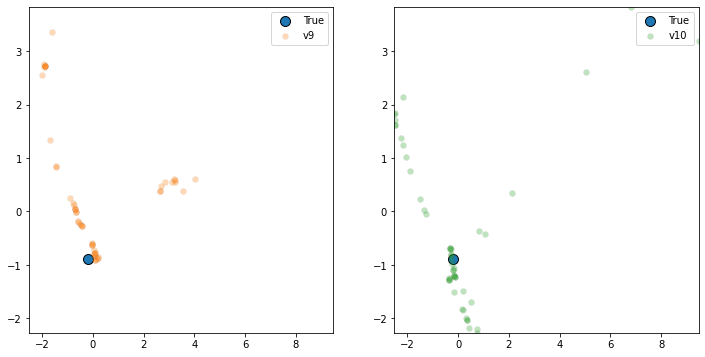


MMD v9: 0.6053791046142578
WSD v9: 0.0480235592000758

MMD v10: 1.6850366592407229
WSD v10: 0.376640212282774


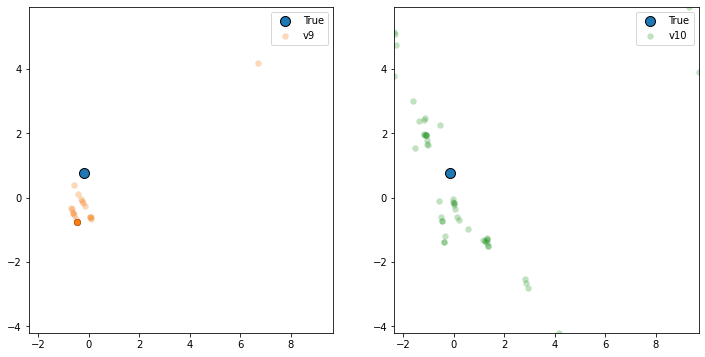


MMD v9: 0.6167640686035156
WSD v9: 0.1615417462077468

MMD v10: 1.796198844909668
WSD v10: 0.5280352215768505


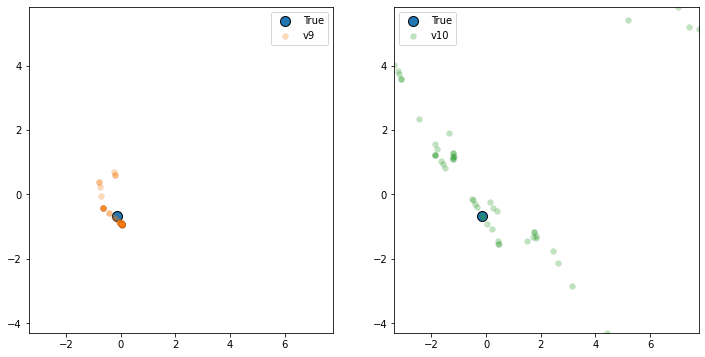


MMD v9: 0.9827508926391602
WSD v9: 0.0050647187130489

MMD v10: 1.9115886688232424
WSD v10: 0.7758621424196508


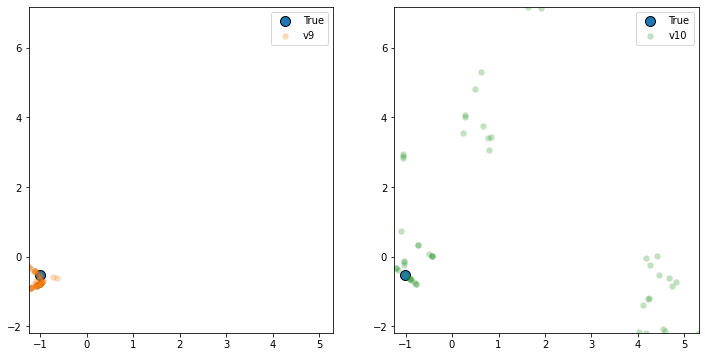


MMD v9: 3.217824935913086
WSD v9: 0.1603048189015716

MMD v10: 2.653239250183105
WSD v10: 0.3835653144998909


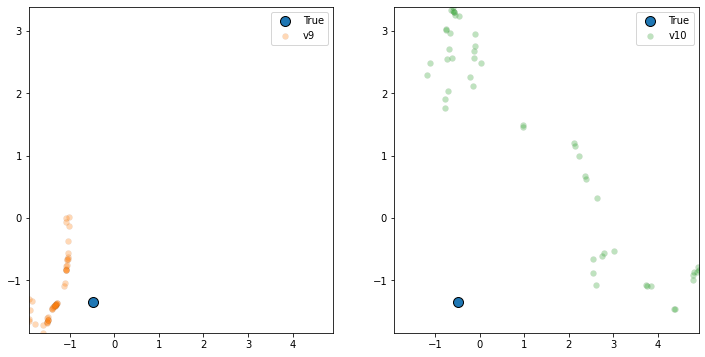


MMD v9: 3.704984664916992
WSD v9: 0.1076529889367251

MMD v10: 3.229688167572021
WSD v10: 0.7228709692171218


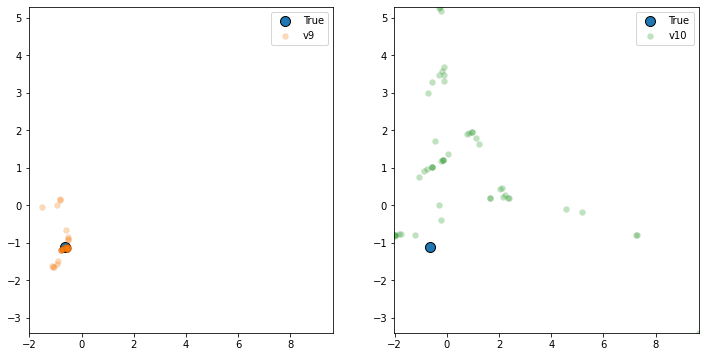


MMD v9: 0.3001022338867187
WSD v9: 0.0003991148768345

MMD v10: 2.2504196166992188
WSD v10: 0.3969124423020942


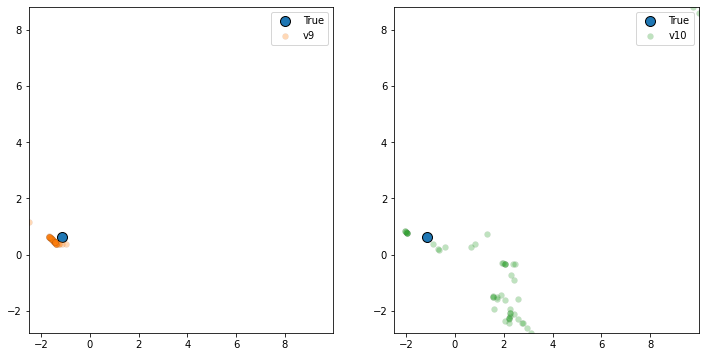


MMD v9: 1.1790037155151367
WSD v9: 0.1272444086660513

MMD v10: 2.034149169921875
WSD v10: 0.0961978951493989


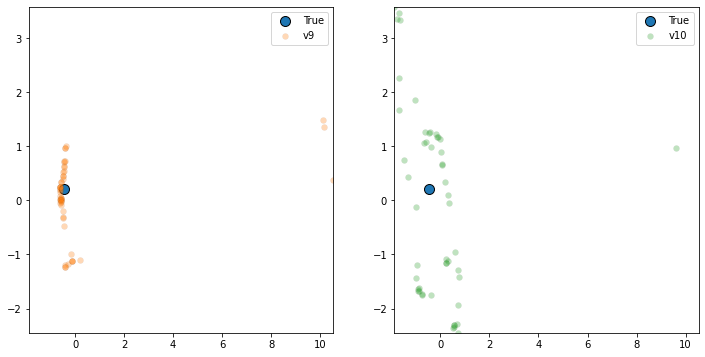


MMD v9: 1.5663766860961914
WSD v9: 0.1257821502321133

MMD v10: 1.8331336975097656
WSD v10: 0.1573150093567809


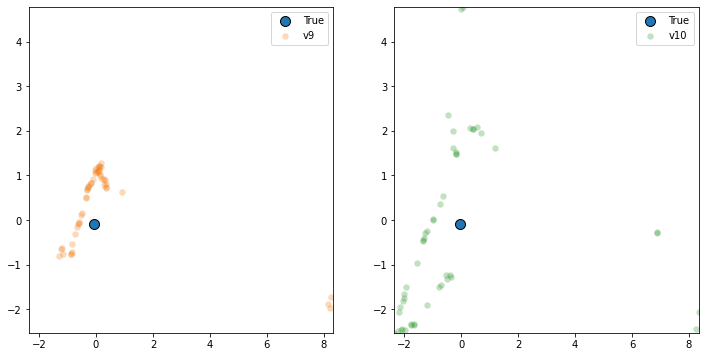


MMD v9: 0.2243661880493164
WSD v9: 0.0002522356248401

MMD v10: 2.756546974182129
WSD v10: 0.7086853447236645


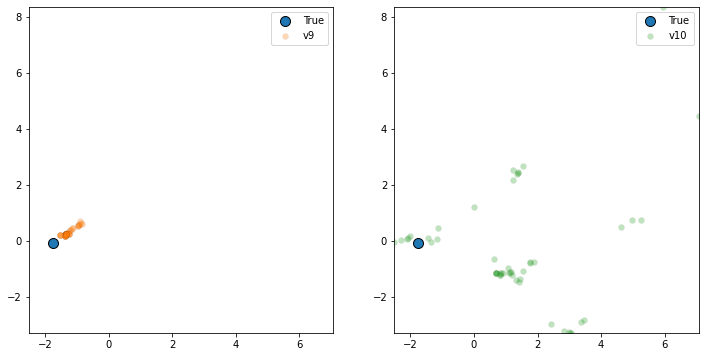


MMD v9: 1.9194660186767576
WSD v9: 0.0506936759251277

MMD v10: 1.4902629852294922
WSD v10: 0.0072871261574093


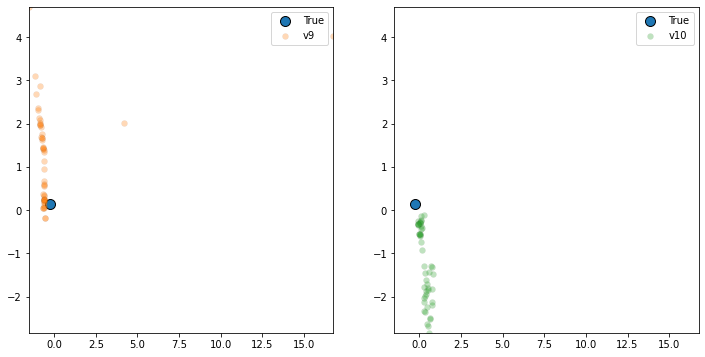


MMD v9: 6.638831615447998
WSD v9: 0.9231434297191906

MMD v10: 3.010021209716797
WSD v10: 0.587780798701269


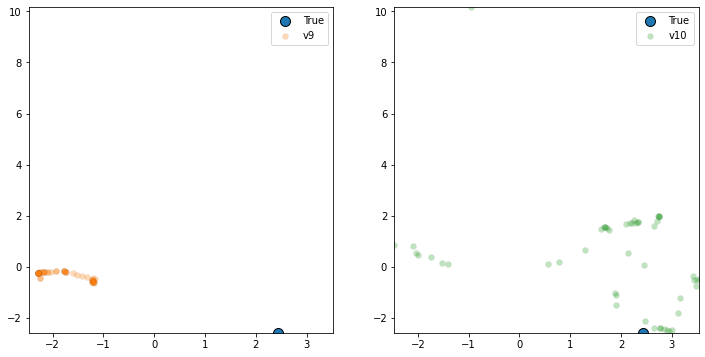


MMD v9: 4.094363212585449
WSD v9: 0.3838342938155644

MMD v10: 3.6031813621521
WSD v10: 0.7491325205625755


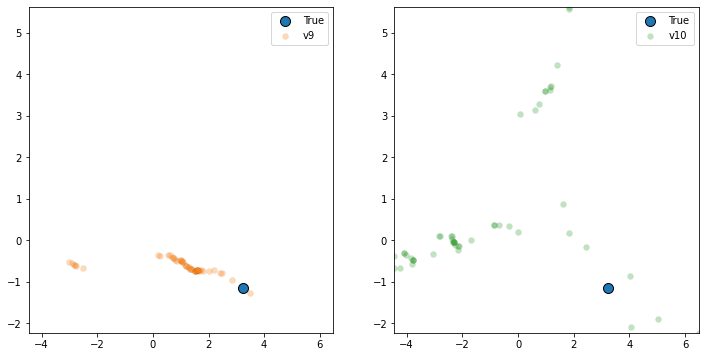


MMD v9: 3.461275100708008
WSD v9: 0.3641173199528148

MMD v10: 2.9213600158691406
WSD v10: 0.5092778849898618


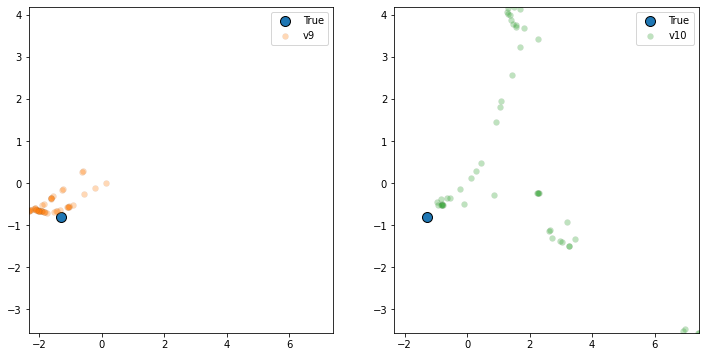


MMD v9: 5.363320827484131
WSD v9: 0.5243319721862445

MMD v10: 4.276180267333984
WSD v10: 1.7919666526614986


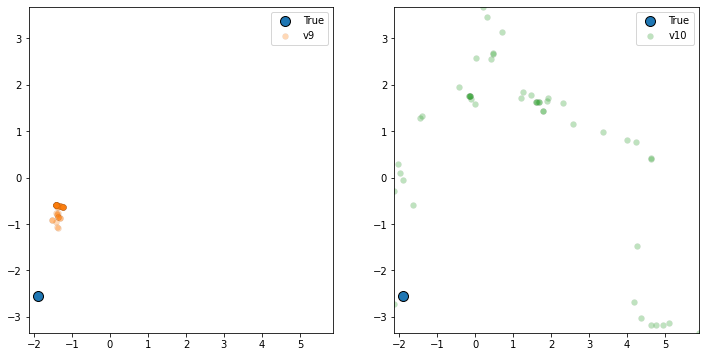


MMD v9: 0.1748580932617187
WSD v9: 0.0402375357050836

MMD v10: 1.5167531967163086
WSD v10: 0.3613709311842961


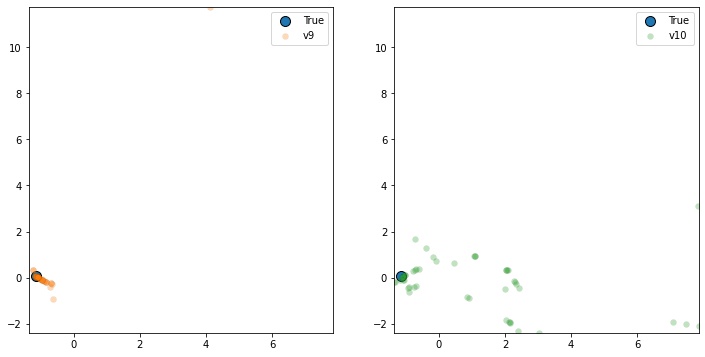


MMD v9: 2.067270278930664
WSD v9: 0.0135372935685285

MMD v10: 2.575035095214844
WSD v10: 0.5380443703506215


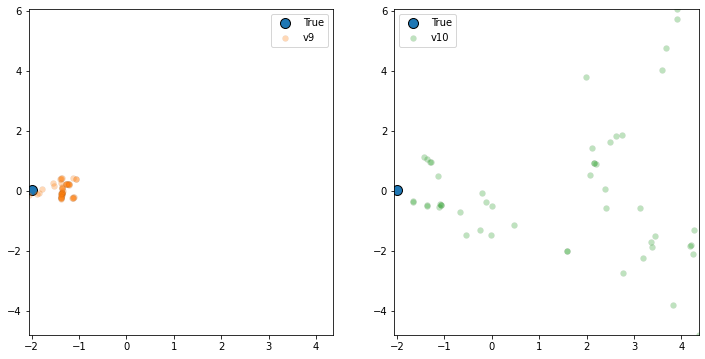


MMD v9: 4.327837944030762
WSD v9: 0.397318759520017

MMD v10: 3.0124101638793945
WSD v10: 0.3858375663576835


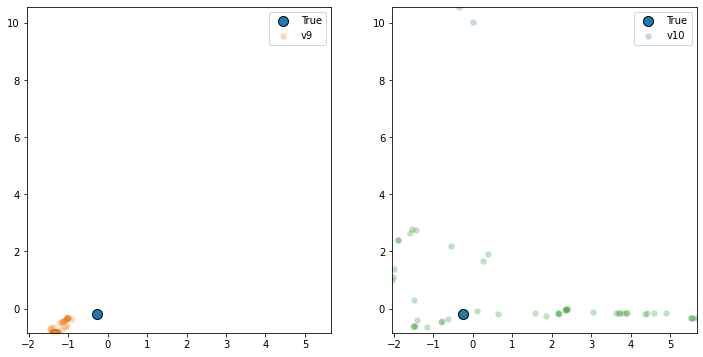


MMD v9: 2.867852210998535
WSD v9: 0.4699594115163471

MMD v10: 4.206203460693359
WSD v10: 0.8362747309291665


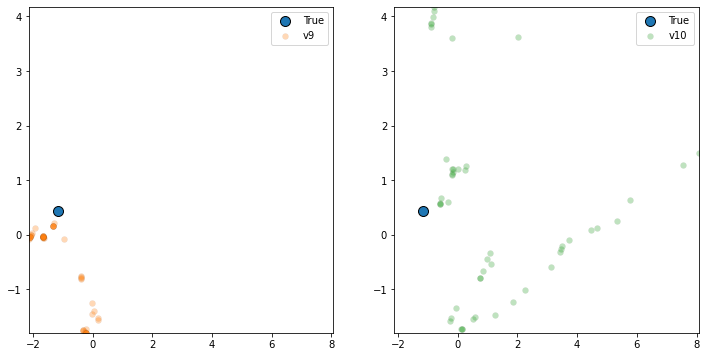


MMD v9: 3.5360593795776367
WSD v9: 0.7578478316428816

MMD v10: 4.163846492767334
WSD v10: 0.8460145851519485


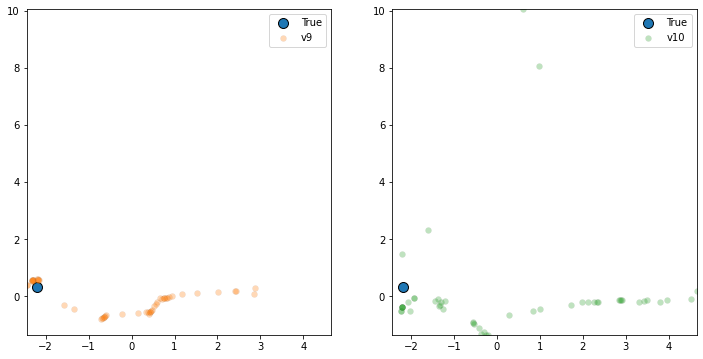


MMD v9: 0.5688533782958984
WSD v9: 0.0284510948183713

MMD v10: 1.7241458892822266
WSD v10: 0.443067338061366


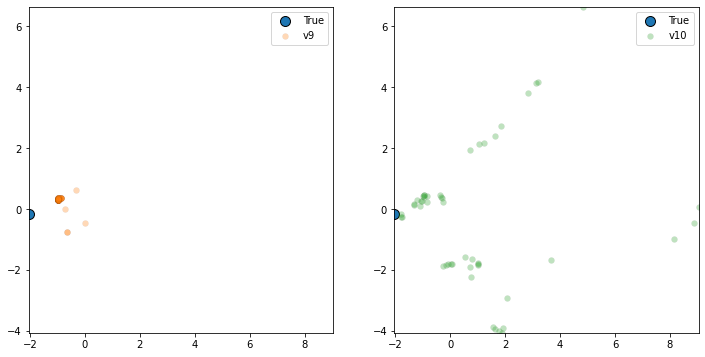


MMD v9: 6.459465026855469
WSD v9: 1.9907761313066568

MMD v10: 3.734663486480713
WSD v10: 1.3530535057102149


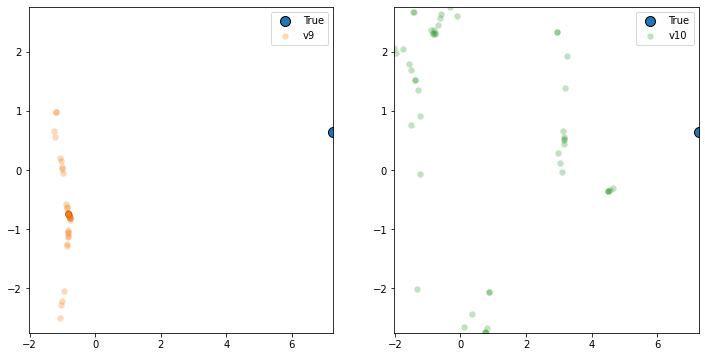


MMD v9: 1.2351579666137695
WSD v9: 0.0022884282893238

MMD v10: 2.57289981842041
WSD v10: 0.0727826937343306


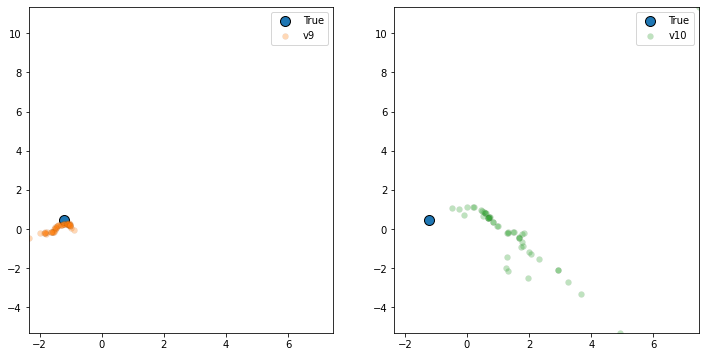


MMD v9: 0.378819465637207
WSD v9: 0.0004485397409335

MMD v10: 1.2285470962524414
WSD v10: 0.0116471976364634


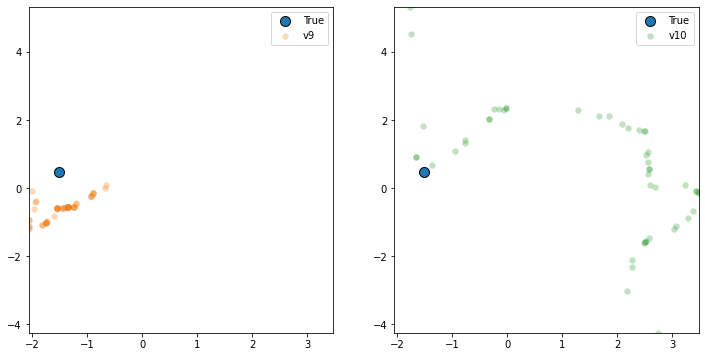


MMD v9: 0.6078805923461914
WSD v9: 0.0015368109669768

MMD v10: 1.7830381393432615
WSD v10: 0.1385228521773669


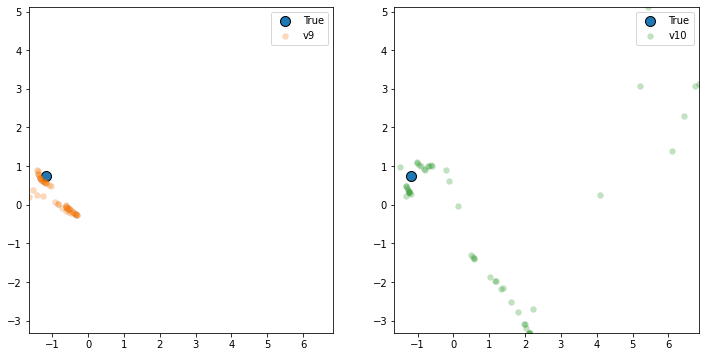


MMD v9: 1.904672622680664
WSD v9: 0.0830141085178365

MMD v10: 3.746396541595459
WSD v10: 0.6845212337545108


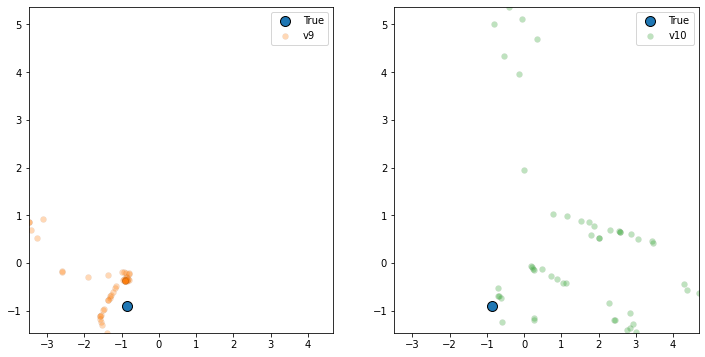


MMD v9: 1.556671142578125
WSD v9: 0.0382995383480679

MMD v10: 2.2100934982299805
WSD v10: 0.4611047306429287


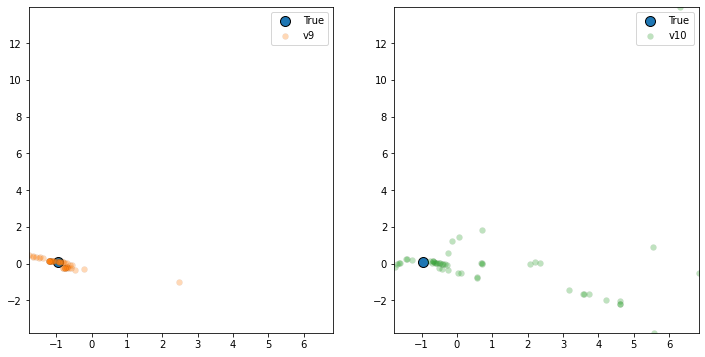


MMD v9: 5.996287345886231
WSD v9: 2.147184369021164

MMD v10: 4.6491217613220215
WSD v10: 1.648161495384983


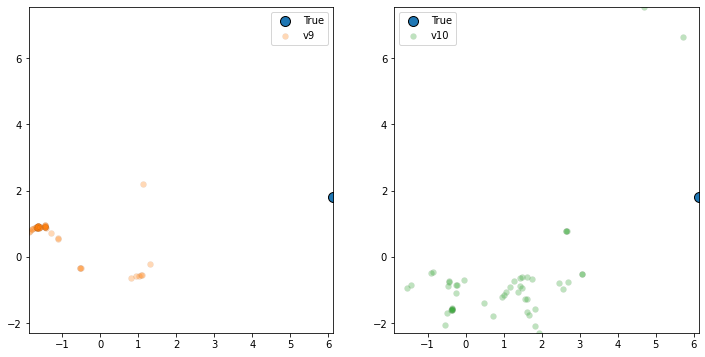


MMD v9: 3.921682357788086
WSD v9: 0.7298169253330684

MMD v10: 3.721280574798584
WSD v10: 0.6196845936885589


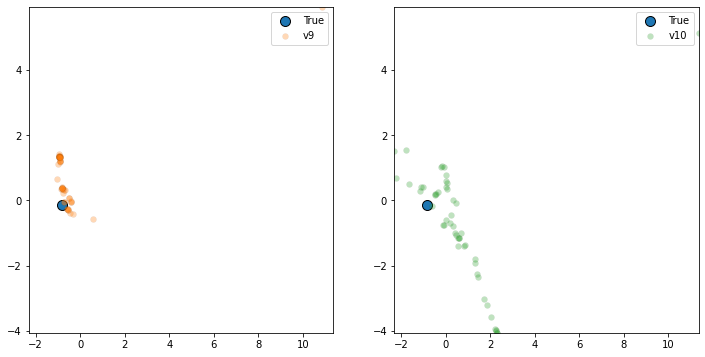


MMD v9: 1.7760334014892578
WSD v9: 0.0624680280082329

MMD v10: 3.5311508178710938
WSD v10: 1.031531736488941


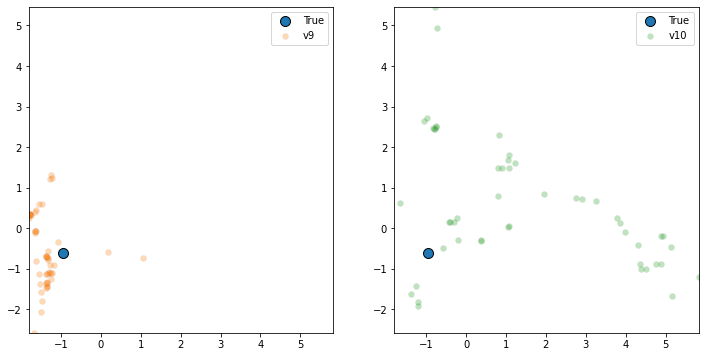

In [7]:
count = 0
for _, row in mmd_zeo_osda_df_v9[::-1][['zeo', 'osda']].iterrows():
    zeo, osda = row['zeo'], row['osda']
    try:
        compare_side_by_side(syn_pred_v9, syn_pred_scaled_v9, syn_pred_v10, syn_pred_scaled_v10, syn_true_v9, syn_true_scaled_v9, dataset, mmd_zeo_agg_df_v9, wsd_zeo_agg_df_v9, mmd_zeo_osda_df_v9, wsd_zeo_osda_df_v9, mmd_zeo_agg_df_v10, wsd_zeo_agg_df_v10, mmd_zeo_osda_df_v10, wsd_zeo_osda_df_v10, zeo=zeo, osda=osda, plot=False, pca=True)
    except Exception as e:
        print(e)

    count += 1
    if count == 30:
        break